In [16]:
import pandas as pd
import researchpy as rp

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\anjir\\Desktop\\Kalpana_ANOVA_Data'

In [8]:
yield_data=pd.read_excel('Soybean2021HarvestDAta1.xls')

In [51]:
#yield_data.head()

In [54]:
yield_dataset=yield_data[['Cover_crop','Plot_id','Replication','bu/acre']]
yield_dataset=yield_dataset.rename(columns={'bu/acre':'Yield'})
yield_dataset.head()

,Cover_crop,Plot_id,Replication,Yield
0,Trit,101,1,66.734009
1,RTO,102,1,54.645803
2,Oat,103,1,56.883334
3,RCK,104,1,56.049039
4,Bare,105,1,51.591460


In [58]:
rp.summary_cont(yield_dataset['Yield'].groupby(yield_dataset['Cover_crop']))

,N,Mean,SD,SE,95% Conf.,Interval
Cover_crop,,,,,,
Bare,4,48.1416,3.9351,1.9676,41.8800,54.4033
Oat,4,48.4082,7.4765,3.7382,36.5115,60.3049
RCK,4,51.7822,3.6037,1.8019,46.0479,57.5166
RTO,4,51.2235,3.3344,1.6672,45.9177,56.5292
Rye,4,51.5287,3.6661,1.8330,45.6951,57.3622
Trit,4,54.1192,9.7006,4.8503,38.6833,69.5550


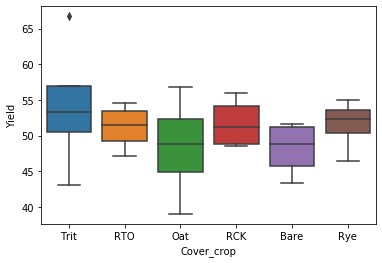

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Cover_crop', y='Yield', data=yield_dataset)
#ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

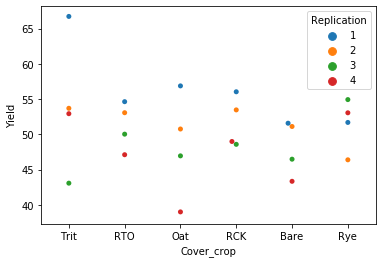

In [68]:
sns.swarmplot(x='Cover_crop', y='Yield',hue="Replication", data=yield_dataset) 

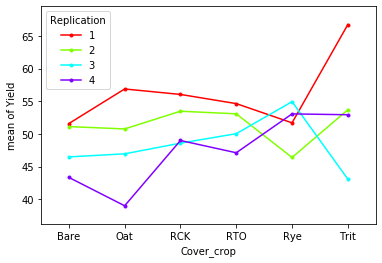

In [49]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=yield_dataset['Cover_crop'], trace=yield_dataset['Replication'], response=yield_dataset['Yield'])
plt.show()

In [61]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Yield ~ C(Replication) + C(Cover_crop)', data=yield_dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Replication),3.0,286.132727,95.377576,4.42987,0.020264
C(Cover_crop),5.0,101.809356,20.361871,0.94572,0.480234
Residual,15.0,322.958371,21.530558,NaN,NaN
